In [2]:
import pandas as pd
df = pd.read_csv('/content/data_2916_20231205.csv', encoding='cp949')


In [3]:
df

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2023/12/05,71200,-1400,-1.93,72300,72400,71200,12129682,867872449160,425048517560000,5969782550
1,2023/12/04,72600,600,0.83,72800,72900,72400,10229267,743359507480,433406213130000,5969782550
2,2023/12/01,72000,-800,-1.10,72400,72500,71700,9871284,710939612000,429824343600000,5969782550
3,2023/11/30,72800,100,0.14,72700,72800,72200,15783714,1146427486200,434600169640000,5969782550
4,2023/11/29,72700,0,0.00,72400,72800,72200,9283933,673194221670,434003191385000,5969782550
...,...,...,...,...,...,...,...,...,...,...,...
243,2022/12/09,60400,1200,2.03,59300,60600,59300,10529632,633777717900,360574866020000,5969782550
244,2022/12/08,59200,300,0.51,58700,59200,58600,12986815,766212023592,353411126960000,5969782550
245,2022/12/07,58900,-300,-0.51,58800,59600,58500,12100662,714083283900,351620192195000,5969782550
246,2022/12/06,59200,-1100,-1.82,59800,60100,59200,13888300,827339804388,353411126960000,5969782550


In [4]:
df.rename(columns={
    '일자': 'date',
    '종가': 'Closing Price',
    '대비': 'Change',
    '등락률': 'Fluctuation Rate',
    '시가': 'Opening Price',
    '고가': 'High Price',
    '저가': 'Low Price',
    '거래량': 'Trading Volume',
    '거래대금': 'Trading Value',
    '시가총액': 'Market Capitalization',
    '상장주식수': 'Number of Listed Shares'
}, inplace=True)


In [5]:
df

,date,Closing Price,Change,Fluctuation Rate,Opening Price,High Price,Low Price,Trading Volume,Trading Value,Market Capitalization,Number of Listed Shares
0,2023/12/05,71200,-1400,-1.93,72300,72400,71200,12129682,867872449160,425048517560000,5969782550
1,2023/12/04,72600,600,0.83,72800,72900,72400,10229267,743359507480,433406213130000,5969782550
2,2023/12/01,72000,-800,-1.10,72400,72500,71700,9871284,710939612000,429824343600000,5969782550
3,2023/11/30,72800,100,0.14,72700,72800,72200,15783714,1146427486200,434600169640000,5969782550
4,2023/11/29,72700,0,0.00,72400,72800,72200,9283933,673194221670,434003191385000,5969782550
...,...,...,...,...,...,...,...,...,...,...,...
243,2022/12/09,60400,1200,2.03,59300,60600,59300,10529632,633777717900,360574866020000,5969782550
244,2022/12/08,59200,300,0.51,58700,59200,58600,12986815,766212023592,353411126960000,5969782550
245,2022/12/07,58900,-300,-0.51,58800,59600,58500,12100662,714083283900,351620192195000,5969782550
246,2022/12/06,59200,-1100,-1.82,59800,60100,59200,13888300,827339804388,353411126960000,5969782550


In [9]:
df['date']=df['date'].str.replace('/','')

In [11]:
df['date']

0      20231205
1      20231204
2      20231201
3      20231130
4      20231129
         ...   
243    20221209
244    20221208
245    20221207
246    20221206
247    20221205
Name: date, Length: 248, dtype: object

In [12]:
df['date']=df['date'].astype(int)

In [13]:
df['date']

0      20231205
1      20231204
2      20231201
3      20231130
4      20231129
         ...   
243    20221209
244    20221208
245    20221207
246    20221206
247    20221205
Name: date, Length: 248, dtype: int64

In [15]:
correlation=df[['date','Opening Price']].corr()

In [16]:
correlation

,date,Opening Price
date,1.000000,0.549054
Opening Price,0.549054,1.000000


<Axes: >

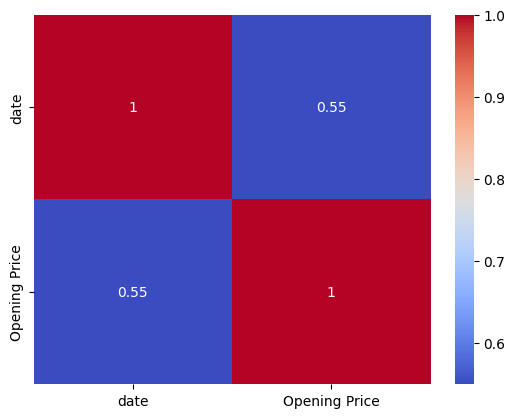

In [23]:
import seaborn as sns

sns.heatmap(correlation,annot=True,cmap='coolwarm')


In [26]:
correlation_with_data=df.corrwith(df['date']).sort_values(ascending=False)

In [27]:
correlation_with_data

date                       1.000000
High Price                 0.550364
Opening Price              0.549054
Market Capitalization      0.548052
Closing Price              0.548052
Low Price                  0.543663
Trading Value              0.263450
Trading Volume             0.176340
Fluctuation Rate           0.103496
Change                     0.093688
Number of Listed Shares         NaN
dtype: float64